In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

<Figure size 640x480 with 0 Axes>

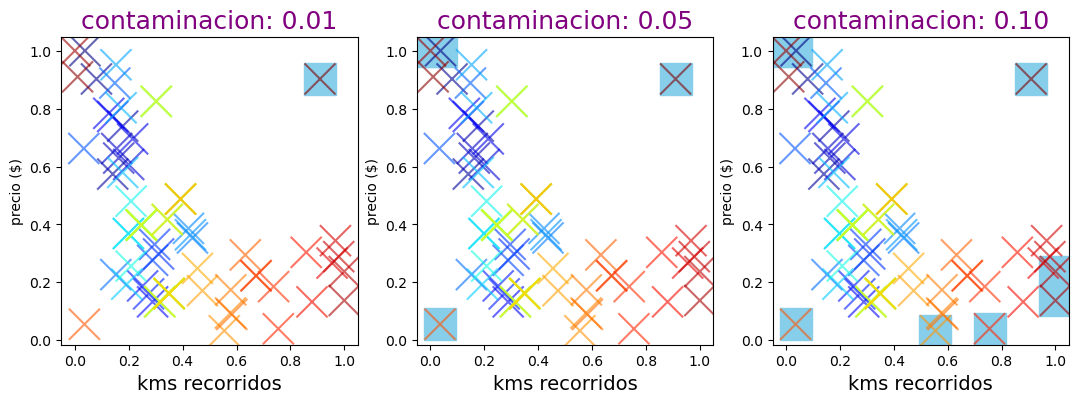

In [17]:
# Cargar los datos
carros = np.loadtxt("carros_usados.csv", delimiter=",")
resultados = np.zeros ((3, carros.size//2))

# Bosque de Aislamiento con diferente contaminacion
c = [0.01, 0.05, 0.1]
for i in range(len(c)):
    modelo = IsolationForest(contamination=c[i]).fit(carros) #Lo unico que hacemos es pasarle el nivel de contaminacion con loos datos que estamos asumiendo y ajustamos el modelo con los datos que tenenmos
    resultados[i] = modelo.predict(carros)
    # Este trabajo se esta haciendo con fines didacticos, porque estamos agarrando los mismos datos para la creacion del modelo para hacer predicciones, en produccion seria diferente tendriamos datos totalmente diferentes

#Graficar datos anomalos
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(carros[resultados[i] == -1][:, 0],
               carros[resultados[i] == -1][:, 1],
               c= "skyblue", marker="s", s=500)
    ax.scatter(carros[:, 0],
               carros[:, 1],
               c=range(carros.size//2), marker="x",
               s=500, alpha=0.6)
    ax.set_title("contaminacion: %0.2f" % c[i], size=18, color="purple")
    ax.set_ylabel("precio ($)", size=10)
    ax.set_xlabel("kms recorridos", size=14)

plt.show()

